# Please take a while and go through my notebook, An upvote although not essential but  is highly appreciated. 

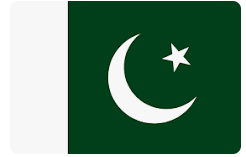 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
survey_2020 = pd.read_csv("../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv", dtype = "object")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
Questions = survey_2020.iloc[0,:]
survey_2020 = survey_2020.drop(index=0)
survey_2020.reset_index(drop=True)

![](http://)**Lets compare how different or similar the pursuits of pakistani men and women are in 2020. **

In [ ]:
PK = survey_2020[survey_2020['Q3']=="Pakistan"]
WORLD = survey_2020[survey_2020['Q3']!="Pakistan"]
#WORLD = WORLD.drop(index=0)
#WORLD.reset_index(drop=True)

# The gender divide 

In [ ]:
import plotly.express as px
PK = PK.rename(columns = {"Q2": "Gender"})
fig = px.histogram(PK["Gender"], histnorm='probability density',title='Pakistan: Gender identity')
fig.show()

In [ ]:
import plotly.express as px
WORLD = WORLD.rename(columns = {"Q2": "Gender"})
fig = px.histogram(WORLD["Gender"], histnorm='probability density',title='World: Gender identity')
fig.show()

# An Insight 

1. Do you know that Islamic Republic of Pakistan officially recognizes three genders MALE, FEMALE and TRANS-GENDERS. You can read more Here at [https://www.npr.org/sections/thetwo-way/2018/05/09/609700652/pakistan-passes-historic-transgender-rights-bill](http://) As you can see that nobody identified as non-binary in the survey. Is this because of the taboo in the Pakistani society of being a transgender ?  AH ! Controversy !! Too much to unpack here.**(UPVOTE ME if you want more analysis)**

2. The perentage of participation is equal to the overall participation of women in the world. 

# Gender distribution by AGE ! 

Lets quickly inquire how the age is distributed... 

In [ ]:
PK = PK.rename(columns = {"Q1": "Age"})

PK["Age"].where(PK["Gender"]=="Man").hist()


In [ ]:
WORLD = WORLD.rename(columns = {"Q1": "Age"})

WORLD["Age"].where(WORLD["Gender"]=="Man").hist()

In [ ]:
PK["Age"].where(PK["Gender"]=="Woman").hist()

Checking for missing values here. 

In [ ]:
WORLD["Age"].where(WORLD["Gender"]=="Woman").hist()

In [ ]:
PK_Women = PK[PK["Gender"]=="Woman"]
PK_Women["Age"].isnull().sum()
PK_Men = PK[PK["Gender"]=="Man"]
PK_Men["Age"].isnull().sum()

In [ ]:
W_Women = WORLD[WORLD["Gender"]=="Woman"]
W_Women["Age"].isnull().sum()
W_Men = WORLD[WORLD["Gender"]=="Man"]
W_Men["Age"].isnull().sum()

Nothing to worry about here... Lets proceed... 

# A Better visualization of the gender distribution? 

Ah ! the things that you have to do for creating visualization ... 

In [ ]:
import plotly as py
import numpy as np
import plotly.graph_objs as go

W_groups = PK_Women["Age"].unique()
women_bins = {}
for idx, group in enumerate(W_groups):
    #print(idx,group)
    #print(PK_Women[PK_Women["Age"]==group].Age.count())
    women_bins[group] = PK_Women[PK_Women["Age"]==group].Age.count()
sorted_women_bins = []
for i in sorted(women_bins.keys()):
    #print(i,women_bins[i])
    sorted_women_bins.append(women_bins[i])
M_groups = PK_Men["Age"].unique()
men_bins = {}
for idx, group in enumerate(M_groups):
    #print(idx,group)
    #print(PK_Men[PK_Men["Age"]==group].Age.count())
    men_bins[group] = PK_Men[PK_Men["Age"]==group].Age.count()
sorted_men_bins = []
for i in sorted(men_bins.keys()):
    #print(i,men_bins[i])
    sorted_men_bins.append(men_bins[i])

sorted_women_bins = np.array(sorted_women_bins)



layout = go.Layout(yaxis=go.layout.YAxis(title='Age'),
                   xaxis=go.layout.XAxis(
                       range=[-25, 80],
                       tickvals=[-25,-20,-15,-10,-5,0,5,10,15, 25, 55, 65,80],
                       ticktext=[25,20,15,10,5,0,5,10,15, 25, 55, 65, 80],
                       title='Count'),
                   barmode='overlay',
                   bargap=0.1)
y = list(sorted(men_bins.keys()))

data = [go.Bar(y=y,
               x=sorted_men_bins,
               orientation='h',
               name='Men',
               hoverinfo='x',
               marker=dict(color='powderblue')
               ),
        go.Bar(y=y,
               x=sorted_women_bins*-1,
               orientation='h',
               name='Women',
               text = sorted_women_bins,
               hoverinfo='text',
               marker=dict(color='seagreen')
               )]

py.offline.iplot(dict(data=data, layout=layout))

# Insights

1. We have no responses from women over the age of 40 ? 
2. Is there hope ? Althought the general number paint a very bleak image of the general participation of women in terms of numbers but if we look at the number of participants in the range of 30 - 40 the gap is smaller. So, I am assuming that women who are in this age demographic are usally working at a professional level. We will dig a little deeper a bit latter. 

# Gender Participation: Pakistan Vs the rest of the World 

In [ ]:
# Pakistan Women 

W_groups = PK_Women["Age"].unique()

women_bins = {}
for idx, group in enumerate(W_groups):
    #print(idx,group)
    #print(PK_Women[PK_Women["Age"]==group].Age.count())
    women_bins[group] = PK_Women[PK_Women["Age"]==group].Age.count()
sorted_women_bins = []
for i in sorted(women_bins.keys()):
    #print(i,women_bins[i])
    sorted_women_bins.append(women_bins[i])

#print("\n")    

# World Women 

WW_groups = W_Women["Age"].unique()

w_women_bins = {}
for idx, group in enumerate(WW_groups):
    #print(idx,group)
    #print(PK_Women[PK_Women["Age"]==group].Age.count())
    w_women_bins[group] = W_Women[W_Women["Age"]==group].Age.count()

sorted_w_women_bins = []
for i in sorted(w_women_bins.keys()):
    #print(i,w_women_bins[i])
    sorted_w_women_bins.append(w_women_bins[i])
    
# Pakistan Man    

M_groups = PK_Men["Age"].unique()
men_bins = {}
for idx, group in enumerate(M_groups):
    #print(idx,group)
    #print(PK_Men[PK_Men["Age"]==group].Age.count())
    men_bins[group] = PK_Men[PK_Men["Age"]==group].Age.count()
sorted_men_bins = []
for i in sorted(men_bins.keys()):
    #print(i,men_bins[i])
    sorted_men_bins.append(men_bins[i])


# World Man    

WM_groups = W_Men["Age"].unique()
w_men_bins = {}
for idx, group in enumerate(WM_groups):
    #print(idx,group)
    #print(PK_Men[PK_Men["Age"]==group].Age.count())
    w_men_bins[group] = W_Men[W_Men["Age"]==group].Age.count()
sorted_w_men_bins = []
for i in sorted(w_men_bins.keys()):
    #print(i,w_men_bins[i])
    sorted_w_men_bins.append(w_men_bins[i])

In [ ]:
sorted_women_bins = np.array(sorted_women_bins)
sorted_w_women_bins= np.array(sorted_w_women_bins)


layout = go.Layout(yaxis=go.layout.YAxis(title='Age'),
                   xaxis=go.layout.XAxis(
                       range=[-0.5, 0.3],
                       tickvals=[-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2],
                       ticktext=[0.5,0.4,0.3,0.2,0.2,0.1, 0,0.1,0.2],
                       title='Percentage'),
                   barmode='overlay',
                   bargap=0.1)
y = list(sorted(w_men_bins.keys()))
data = [
        go.Bar(y=y,
               x=(sorted_women_bins/np.sum(sorted_women_bins))*-1,
               orientation='h',
               name='Pakistani Women',
               text=-1 * sorted_women_bins,
               hoverinfo='text',
               marker=dict(color='Green')
               ),
    
        go.Bar(y=y,
               x=(sorted_w_women_bins/np.sum(sorted_w_women_bins)),
               orientation='h',
               name = "Women of the World",
               opacity=0.5,
               marker=dict(color='blue')
               )]

py.offline.iplot(dict(data=data, layout=layout))

# A rosy picture for the women of my land ! I am so excited !! 

In [ ]:
sorted_women_bins = np.array(sorted_women_bins)
sorted_w_women_bins= np.array(sorted_w_women_bins)


layout = go.Layout(yaxis=go.layout.YAxis(title='Age'),
                   xaxis=go.layout.XAxis(
                       range=[-0.5, 0.3],
                       tickvals=[-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2],
                       ticktext=[0.5,0.4,0.3,0.2,0.2,0.1, 0,0.1,0.2],
                       title='Percentage'),
                   barmode='overlay',
                   bargap=0.1)
y = list(sorted(w_men_bins.keys()))
data = [
        go.Bar(y=y,
               x=(sorted_men_bins/np.sum(sorted_men_bins))*-1,
               orientation='h',
               name='Pakistani Men',
               text=-1 * sorted_men_bins,
               hoverinfo='text',
               marker=dict(color='Green')
               ),
    
        go.Bar(y=y,
               x=(sorted_w_men_bins/np.sum(sorted_w_men_bins)),
               orientation='h',
               name = "Men of the World",
               opacity=0.5,
               marker=dict(color='blue')
               )]

py.offline.iplot(dict(data=data, layout=layout))

In [ ]:

layout = go.Layout(yaxis=go.layout.YAxis(title='Age'),
                   xaxis=go.layout.XAxis(
                       range=[-0.5, 0.5],
                       tickvals=[-0.5,0.5],
                       ticktext=[0.5, 0, 0.5],
                       title='Percentage'),
                   barmode='overlay',
                   bargap=0.1)
y = list(sorted(w_men_bins.keys()))
data = [go.Bar(y=y,
               x=sorted_men_bins/np.sum(sorted_men_bins),
               orientation='h',
               name='Pakistani Men',
               hoverinfo='x',
               marker=dict(color='powderblue')
               ),

        go.Bar(y=y,
               x=sorted_w_men_bins/np.sum(sorted_w_men_bins),
               orientation='h',
               hoverinfo='x',
               showlegend=True,
               name = "Men of the World",
               opacity=0.5,
               marker=dict(color='teal')
               ),
        go.Bar(y=y,
               x=(sorted_women_bins/np.sum(sorted_women_bins))*-1,
               orientation='h',
               name='Pakistani Women',
               text=-1 * sorted_women_bins,
               hoverinfo='text',
               marker=dict(color='seagreen')
               ),
        go.Bar(y=y,
               x=(sorted_w_women_bins/np.sum(sorted_w_women_bins))*-1,
               orientation='h',
               text=-1 * sorted_w_women_bins,
               hoverinfo='text',
               name="Women of the World",
               showlegend=True,
               opacity=0.2,
               marker=dict(color='darkgreen')
               )]

py.offline.iplot(dict(data=data, layout=layout))

# Thats all for now FOLKS ! don't forget to upvote me please 